In [1]:
from graphs import *

In [2]:
modelpath = "../saved/models/paper_coco_model.pt" #path to the saved model
modeltype = "coco" #type of model: 'mnist' or 'coco'
cocoroot = '../../../../data/jordanlei/coco/images/val2017' #path to the coco val dataset
annpath = '../../../../data/jordanlei/coco/annotations/instances_val2017.json' #path to the coco val annotations
metadatapath = '../data/metadata/cocometadata_test.p' #path to metadata file (will create one if none exists)


n = 2 #number of objects
strength = 0.3 #strength of attention
net, runner, test_loader = load_model_and_data(modelpath, n = n, strength = strength, modeltype = modeltype,\
                                               cocoroot = cocoroot, annpath = annpath, metadatapath = metadatapath)

COCO Object-Based Attention Model v3
loading annotations into memory...
Done (t=0.46s)
creating index...
index created!


In [3]:
def get_train_val_split(coco_dataset, split = 0.7):
    len_dataset = len(coco_dataset)
    len_train = int(split*len_dataset)
    len_val = len_dataset - len_train
    train, val = torch.utils.data.random_split(coco_dataset, [len_train, len_val])
    return train, val

In [4]:
torch.manual_seed(100)
n = 2 #number of objects
strength = 0.3 #strength of attention
cocoroot = '../../../../data/jordanlei/coco/images/train2017' #path to the coco val dataset
annpath = '../../../../data/jordanlei/coco/annotations/instances_train2017.json' #path to the coco val annotations
metadatapath = '../data/metadata/cocometadata_train.p' #path to metadata file (will create one if none exists)
coco_dataset, metadata = coco_get_data(cocoroot, annpath, metadatapath, size = (100, 100), strength = strength, use_supercategory = True)
train, val = get_train_val_split(coco_dataset)
train_loader = DataLoader(train, batch_size = 32, shuffle = True, num_workers=4)
val_loader = DataLoader(val, batch_size = 32, shuffle = True, num_workers=4)

loading annotations into memory...
Done (t=12.28s)
creating index...
index created!


Validating ...


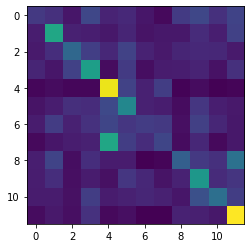

F1: 0.23337173630296137
Acc 0.3190893169877408


In [5]:
val_acc, ground_truth, pred = runner.test(val_loader)
print("Acc", val_acc)

In [13]:
def equal_weight_acc(truth, predictions): 
    indices = [truth == x for x in set(truth)]
    return np.mean([(truth[i] == predictions[i]).mean() for i in indices])

equal_weight_acc(ground_truth, pred)

0.2737437145790336

In [7]:
len(coco_dataset)

19033

In [8]:
len(train_loader.dataset)

13323

In [9]:
metric_files = ["newcoco1.csv"]

In [10]:
df = files_to_df(metric_files)
df.head()

,Unnamed: 0,acc,f1,final_acc,loss,smooth_acc,smooth_f1,step,val_acc,val_f1,val_step,train_acc,convert_train,convert_train_steps,train_f1,final_f1,convert_val,convert_val_steps
0,0,"[0.25, 0.03125, 0.15625, 0.0, 0.15625, 0.0625,...","[0.07240143369175628, 0.007575757575757576, 0....",0.319089,"[184.37957763671875, 12.279006958007812, 116.8...","[0.25, 0.140625, 0.14583333333333334, 0.109375...","[0.07240143369175628, 0.039988595633756924, 0....","[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, ...","[0.10989492119089317, 0.11033274956217162, 0.1...","[0.03150231808319046, 0.05322624543445518, 0.0...","[0, 417, 834, 1251, 1668, 2085, 2502, 2919, 33...",0.366278,"[0.25, 0.140625, 0.14583333333333334, 0.109375...","[0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, ...",0.250015,0.230445,"[0.10989492119089317, 0.11033274956217162, 0.1...","[0.0, 417.0, 834.0, 1251.0, 1668.0, 2085.0, 25..."


In [31]:
df = pd.read_csv("inhibition_score_mnist.csv")

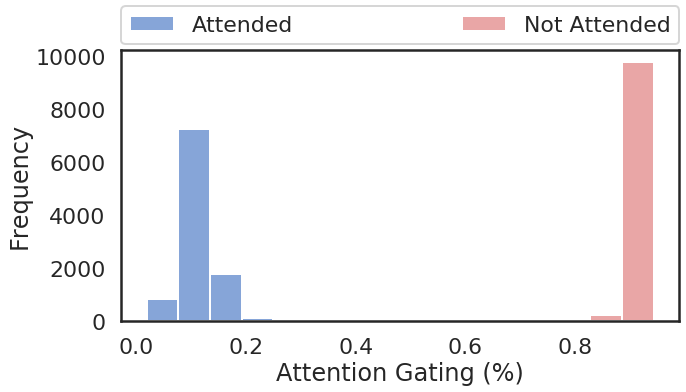

In [32]:
colors = ["#d44e4e", "#0e4db3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10, 5))
sns.set_style("white")
sns.set_context("poster")
sns.histplot(data = df, x = "inhibition", hue="condition")
plt.ylabel("Frequency")
plt.xlabel("Attention Gating (%)")
plt.legend(["Attended", "Not Attended"], bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
        ncol=2, mode="expand", borderaxespad=0.)
plt.savefig("graphs/inhibition_mnist.svg")

<Figure size 432x288 with 0 Axes>